In [1]:
import numpy as np 
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline


import time
from sklearn import linear_model
from scipy.stats.stats import pearsonr
import random
from sklearn.linear_model import Ridge

import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
#Loads the training data set, and the test data set randomly. Also can apply any filters

proj_dir="C:\\Users\Rees\\Documents\\Python Scripts\\Kaggle\\Earth Quake Guessing\\all (1)\\"
data_dir="no_overlap_cuts\\"
data=listdir(proj_dir+data_dir)
random.shuffle(data)

ntrain=4000
ntest=100

listdir(proj_dir+data_dir)
train_set=data[0:ntrain]
test_set=data[ntrain+1:ntrain+ntest]

x_train=[]
y_train=[]
for i in range(len(train_set)):
    holder=np.load(proj_dir+data_dir+train_set[i])
    x_train.append(holder[1])
    y_train.append(holder[0][0])
x_train=np.array(x_train,dtype=float)
print("Train Set Loaded")

x_test=[]
y_test=[]
for i in range(len(test_set)):
    holder=np.load(proj_dir+data_dir+test_set[i])
    x_test.append(holder[1])
    y_test.append(holder[0][0])
x_test=np.array(x_test,dtype=float)

print("Train Set Loaded")

Train Set Loaded
Train Set Loaded


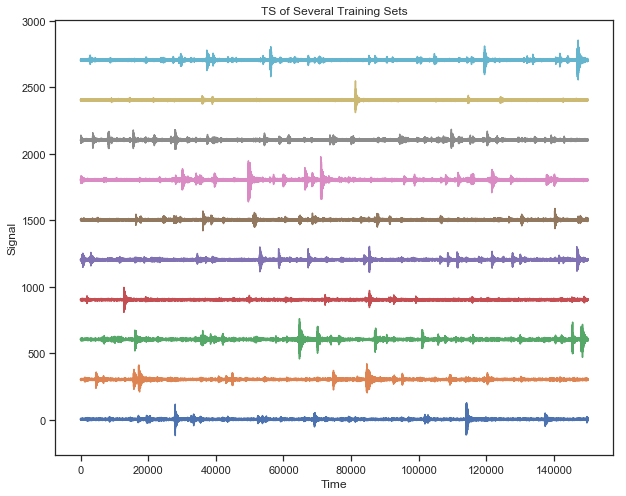

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
N=51

for i in range(10):
    sample1=x_train[i]
    ax.plot(sample1+i*300)
ax.set_xlabel("Time")
ax.set_ylabel("Signal")
ax.set_title("TS of Several Training Sets");

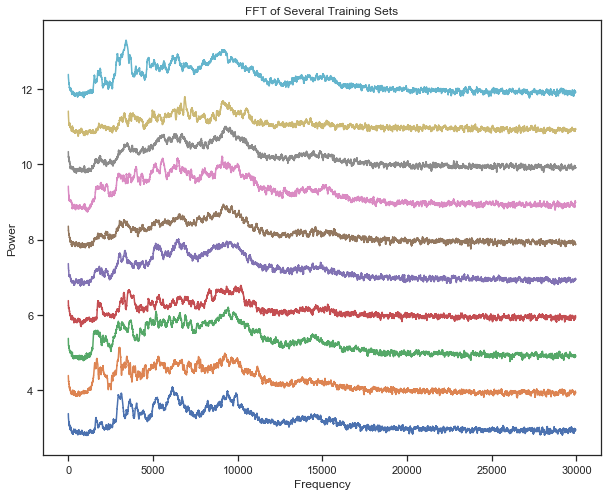

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
N=51
cut=30000

for i in range(10):
    sample1=x_train[i]
    fftmag=np.log10(np.abs(np.fft.fft(sample1))[0:cut])
    fftmag=np.convolve(fftmag,np.ones((N,))/N,mode='valid')
    ax.plot(fftmag+i)
ax.set_xlabel("Frequency")
ax.set_ylabel("Power")
ax.set_title("FFT of Several Training Sets");



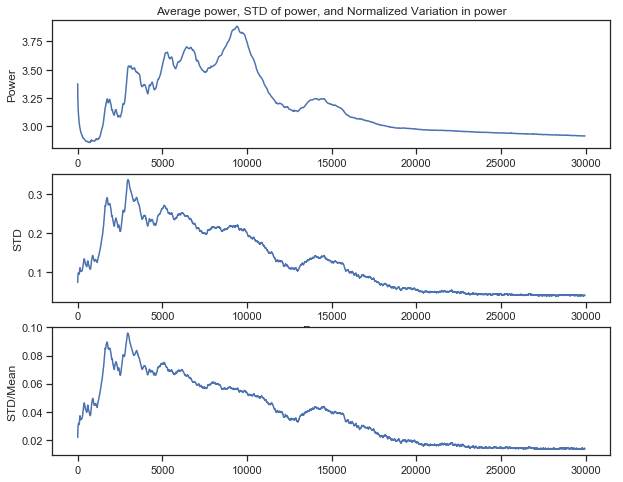

In [5]:
fft_Vec=[]
for i in range(4000):
    sample1=x_train[i]
    fftmag=np.log10(np.abs(np.fft.fft(sample1))[0:cut])
    fftmag=np.convolve(fftmag,np.ones((N,))/N,mode='valid')
    fft_Vec.append(fftmag)

fig, ax = plt.subplots(3,1,figsize=(10,8))
ax[0].plot(np.mean(fft_Vec,0))
ax[2].plot(np.std(fft_Vec,0)/np.mean(fft_Vec,0))
ax[1].plot(np.std(fft_Vec,0))
ax[1].set_xlabel("Frequency")
ax[0].set_ylabel("Power")
ax[2].set_ylabel("STD/Mean")
ax[1].set_ylabel("STD")
ax[0].set_title("Average power, STD of power, and Normalized Variation in power")  

allm=np.mean(fft_Vec,0)

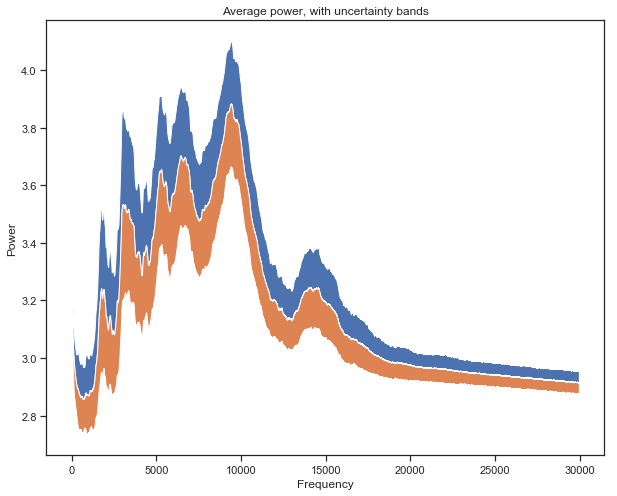

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.fill_between([i for i in range(len(np.mean(fft_Vec,0)))],np.mean(fft_Vec,0),np.mean(fft_Vec,0)+np.std(fft_Vec,0))
ax.fill_between([i for i in range(len(np.mean(fft_Vec,0)))],np.mean(fft_Vec,0),np.mean(fft_Vec,0)-np.std(fft_Vec,0))
ax.set_xlabel("Frequency")
ax.set_ylabel("Power")
ax.set_title("Average power, with uncertainty bands");


In [7]:
fft_Vec=[]
for i in range(4000):
    sample1=x_train[i]
    fftmag=np.log10(np.abs(np.fft.fft(sample1))[0:cut])
    fftmag=np.convolve(fftmag,np.ones((N,))/N,mode='valid')
    fft_Vec.append(fftmag)
allm=np.mean(fft_Vec,0)

fft_Vec_0=[]
fft_Vec_1=[]
fft_Vec_2=[]
fft_Vec_3=[]
fft_Vec_4=[]
fft_Vec_5=[]
fft_Vec_6=[]
fft_Vec_7=[]
fft_Vec_8=[]
fft_Vec_9=[]
for i in range(4000):
    sample1=x_train[i]
    fftmag=np.log10(np.abs(np.fft.fft(sample1))[0:cut])
    fftmag=np.convolve(fftmag,np.ones((N,))/N,mode='valid')
    if y_train[i]>9:
        fft_Vec_9.append(fftmag)
    elif y_train[i]<9 and y_train[i]>8:
        fft_Vec_8.append(fftmag)
    elif y_train[i]<8 and y_train[i]>7:
        fft_Vec_7.append(fftmag)
    elif y_train[i]<7 and y_train[i]>6:
        fft_Vec_6.append(fftmag)
    elif y_train[i]<6 and y_train[i]>5:
        fft_Vec_5.append(fftmag)  
    elif y_train[i]<5 and y_train[i]>4:
        fft_Vec_4.append(fftmag)
    elif y_train[i]<4 and y_train[i]>3:
        fft_Vec_3.append(fftmag)
    elif y_train[i]<3 and y_train[i]>2:
        fft_Vec_2.append(fftmag)
    elif y_train[i]<2 and y_train[i]>1:
        fft_Vec_1.append(fftmag)
    else:
        fft_Vec_0.append(fftmag)

m0=np.mean(fft_Vec_0,0)
m1=np.mean(fft_Vec_1,0)
m2=np.mean(fft_Vec_2,0)
m3=np.mean(fft_Vec_3,0)
m4=np.mean(fft_Vec_4,0)
m5=np.mean(fft_Vec_5,0)
m6=np.mean(fft_Vec_6,0)
m7=np.mean(fft_Vec_7,0)
m8=np.mean(fft_Vec_8,0)
m9=np.mean(fft_Vec_9,0)

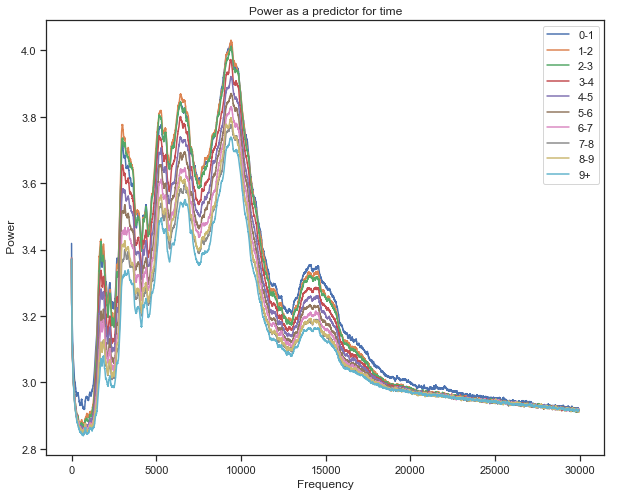

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(m0)
ax.plot(m1)
ax.plot(m2)
ax.plot(m3)
ax.plot(m4)
ax.plot(m5)
ax.plot(m6)
ax.plot(m7)
ax.plot(m8)
ax.plot(m9)
ax.legend(["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9+"])
ax.set_xlabel("Frequency")
ax.set_ylabel(" Power")
ax.set_title("Power as a predictor for time");

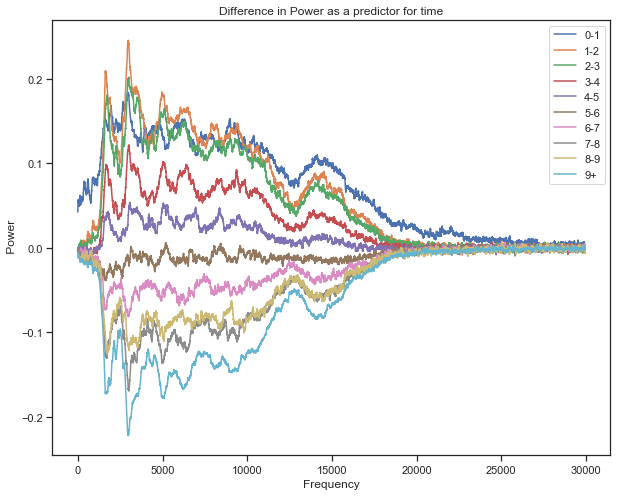

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(m0-allm)
ax.plot(m1-allm)
ax.plot(m2-allm)
ax.plot(m3-allm)
ax.plot(m4-allm)
ax.plot(m5-allm)
ax.plot(m6-allm)
ax.plot(m7-allm)
ax.plot(m8-allm)
ax.plot(m9-allm)
ax.legend(["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9+"])
ax.set_xlabel("Frequency")
ax.set_ylabel(" Power")
ax.set_title("Difference in Power as a predictor for time");

In [10]:
fft_Vec=[]
for i in range(4000):
    sample1=x_train[i]
    fftmag=np.log10(np.abs(np.fft.fft(sample1))[0:cut])
    fftmag=np.convolve(fftmag,np.ones((N,))/N,mode='valid')
    fft_Vec.append(fftmag)
allm=np.mean(fft_Vec,0)

fft_Vec_0=[]
fft_Vec_1=[]
fft_Vec_2=[]
fft_Vec_3=[]
fft_Vec_4=[]
fft_Vec_5=[]
fft_Vec_6=[]
fft_Vec_7=[]
fft_Vec_8=[]
fft_Vec_9=[]
for i in range(4000):
    sample1=x_train[i]
    fftmag=np.log10(np.abs(np.fft.fft(sample1))[0:cut])
    fftmag=np.convolve(fftmag,np.ones((N,))/N,mode='valid')
    if y_train[i]>9:
        fft_Vec_9.append(fftmag)
    elif y_train[i]<9 and y_train[i]>8:
        fft_Vec_8.append(fftmag)
    elif y_train[i]<8 and y_train[i]>7:
        fft_Vec_7.append(fftmag)
    elif y_train[i]<7 and y_train[i]>6:
        fft_Vec_6.append(fftmag)
    elif y_train[i]<6 and y_train[i]>5:
        fft_Vec_5.append(fftmag)  
    elif y_train[i]<5 and y_train[i]>4:
        fft_Vec_4.append(fftmag)
    elif y_train[i]<4 and y_train[i]>3:
        fft_Vec_3.append(fftmag)
    elif y_train[i]<3 and y_train[i]>2:
        fft_Vec_2.append(fftmag)
    elif y_train[i]<2 and y_train[i]>1:
        fft_Vec_1.append(fftmag)
    else:
        fft_Vec_0.append(fftmag)

m0=np.mean(fft_Vec_0,0)
m1=np.mean(fft_Vec_1,0)
m2=np.mean(fft_Vec_2,0)
m3=np.mean(fft_Vec_3,0)
m4=np.mean(fft_Vec_4,0)
m5=np.mean(fft_Vec_5,0)
m6=np.mean(fft_Vec_6,0)
m7=np.mean(fft_Vec_7,0)
m8=np.mean(fft_Vec_8,0)
m9=np.mean(fft_Vec_9,0)

allm=np.divide(allm,np.mean(allm))

m0=np.divide(m0,np.mean(m0))
m1=np.divide(m1,np.mean(m1))
m2=np.divide(m2,np.mean(m2))
m3=np.divide(m3,np.mean(m3))
m4=np.divide(m4,np.mean(m4))
m5=np.divide(m5,np.mean(m5))
m6=np.divide(m6,np.mean(m6))
m7=np.divide(m7,np.mean(m7))
m8=np.divide(m8,np.mean(m8))
m9=np.divide(m9,np.mean(m9))

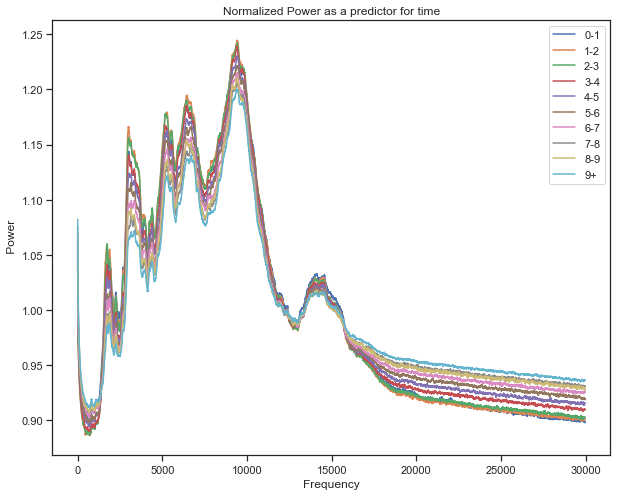

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(m0)
ax.plot(m1)
ax.plot(m2)
ax.plot(m3)
ax.plot(m4)
ax.plot(m5)
ax.plot(m6)
ax.plot(m7)
ax.plot(m8)
ax.plot(m9)
ax.legend(["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9+"])
ax.set_xlabel("Frequency")
ax.set_ylabel(" Power")
ax.set_title("Normalized Power as a predictor for time");

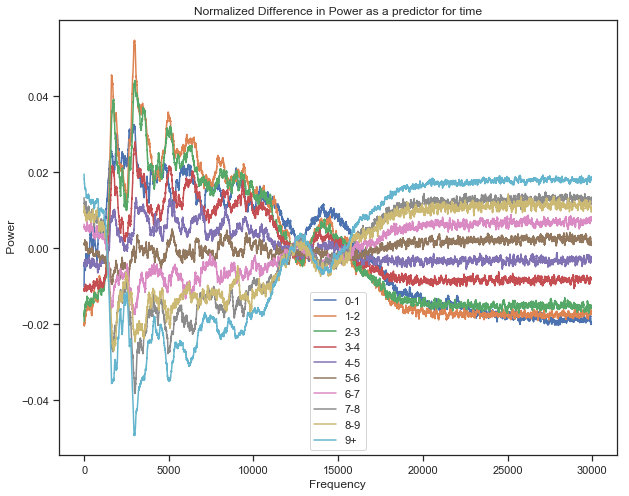

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(m0-allm)
ax.plot(m1-allm)
ax.plot(m2-allm)
ax.plot(m3-allm)
ax.plot(m4-allm)
ax.plot(m5-allm)
ax.plot(m6-allm)
ax.plot(m7-allm)
ax.plot(m8-allm)
ax.plot(m9-allm)
ax.legend(["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9+"])
ax.set_xlabel("Frequency")
ax.set_ylabel(" Power")
ax.set_title("Normalized Difference in Power as a predictor for time");

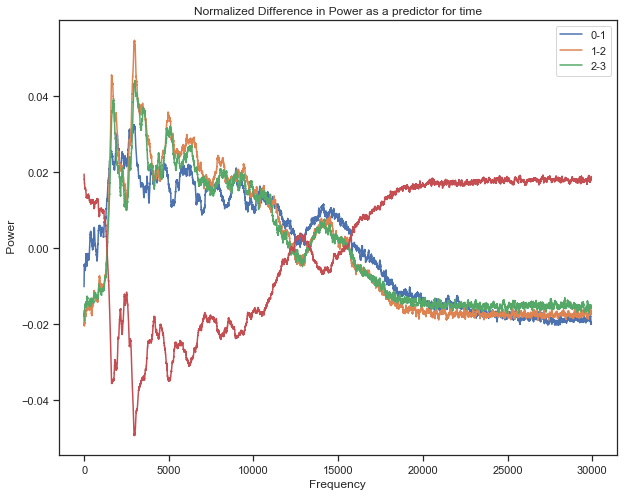

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(m0-allm)
ax.plot(m1-allm)
ax.plot(m2-allm)
ax.plot(m9-allm)
ax.legend(["0-1","1-2","2-3"])
ax.set_xlabel("Frequency")
ax.set_ylabel(" Power")
ax.set_title("Normalized Difference in Power as a predictor for time");

C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Correlations in power differences for various frequency bands


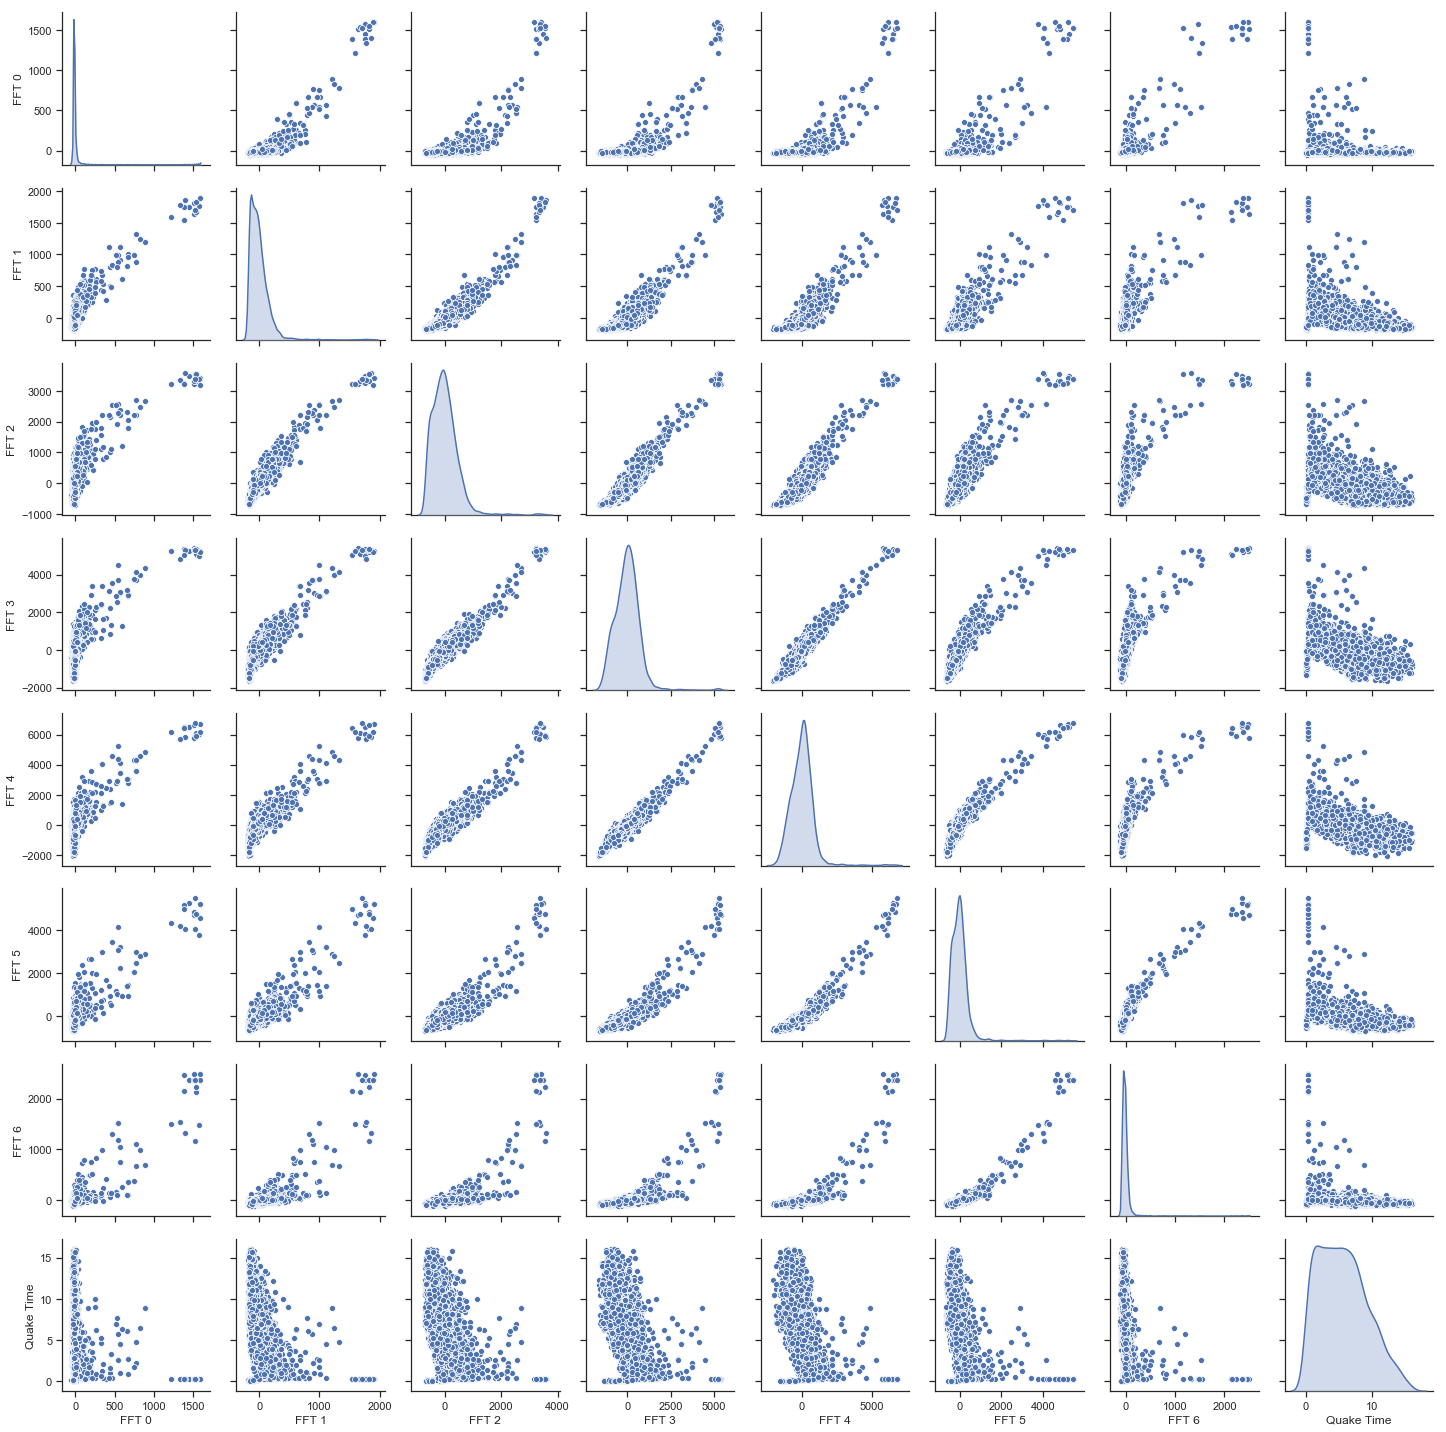

In [14]:
cuts=[0,1000,2000,4000,7500,12500,17000,20000,25000]
time_to_event=[]
summed_band_diff_0=[]
summed_band_diff_1=[]
summed_band_diff_2=[]
summed_band_diff_3=[]
summed_band_diff_4=[]
summed_band_diff_5=[]
summed_band_diff_6=[]
cmin=20000
cmax=25000
N=5

fft_Vec=[]
for i in range(4000):
    sample1=x_train[i]
    fftmag=np.log10(np.abs(np.fft.fft(sample1))[0:cut])
    fft_Vec.append(fftmag)
allm=np.mean(fft_Vec,0)
allm=np.divide(allm,1)


for i in range(4000):
    sample1=x_train[i]
    time_to_event.append(y_train[i])
    fftmag=np.log10(np.abs(np.fft.fft(sample1))[0:cut])
    fftmag=np.divide(fftmag,1)-allm
    summed_band_diff_0.append(np.sum(fftmag[cuts[0]:cuts[1]]))
    summed_band_diff_1.append(np.sum(fftmag[cuts[1]:cuts[2]]))
    summed_band_diff_2.append(np.sum(fftmag[cuts[2]:cuts[3]]))
    summed_band_diff_3.append(np.sum(fftmag[cuts[3]:cuts[4]]))
    summed_band_diff_4.append(np.sum(fftmag[cuts[4]:cuts[5]]))
    summed_band_diff_5.append(np.sum(fftmag[cuts[5]:cuts[6]]))
    summed_band_diff_6.append(np.sum(fftmag[cuts[6]:cuts[7]]))
    
d = {"FFT 0":summed_band_diff_0,"FFT 1":summed_band_diff_1,"FFT 2":summed_band_diff_2,"FFT 3":summed_band_diff_3,"FFT 4":summed_band_diff_4,\
    "FFT 5":summed_band_diff_5,"FFT 6":summed_band_diff_6,"Quake Time":time_to_event}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")
print("Correlations in power differences for various frequency bands")

C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Correlations in normalized power differences for various frequency bands


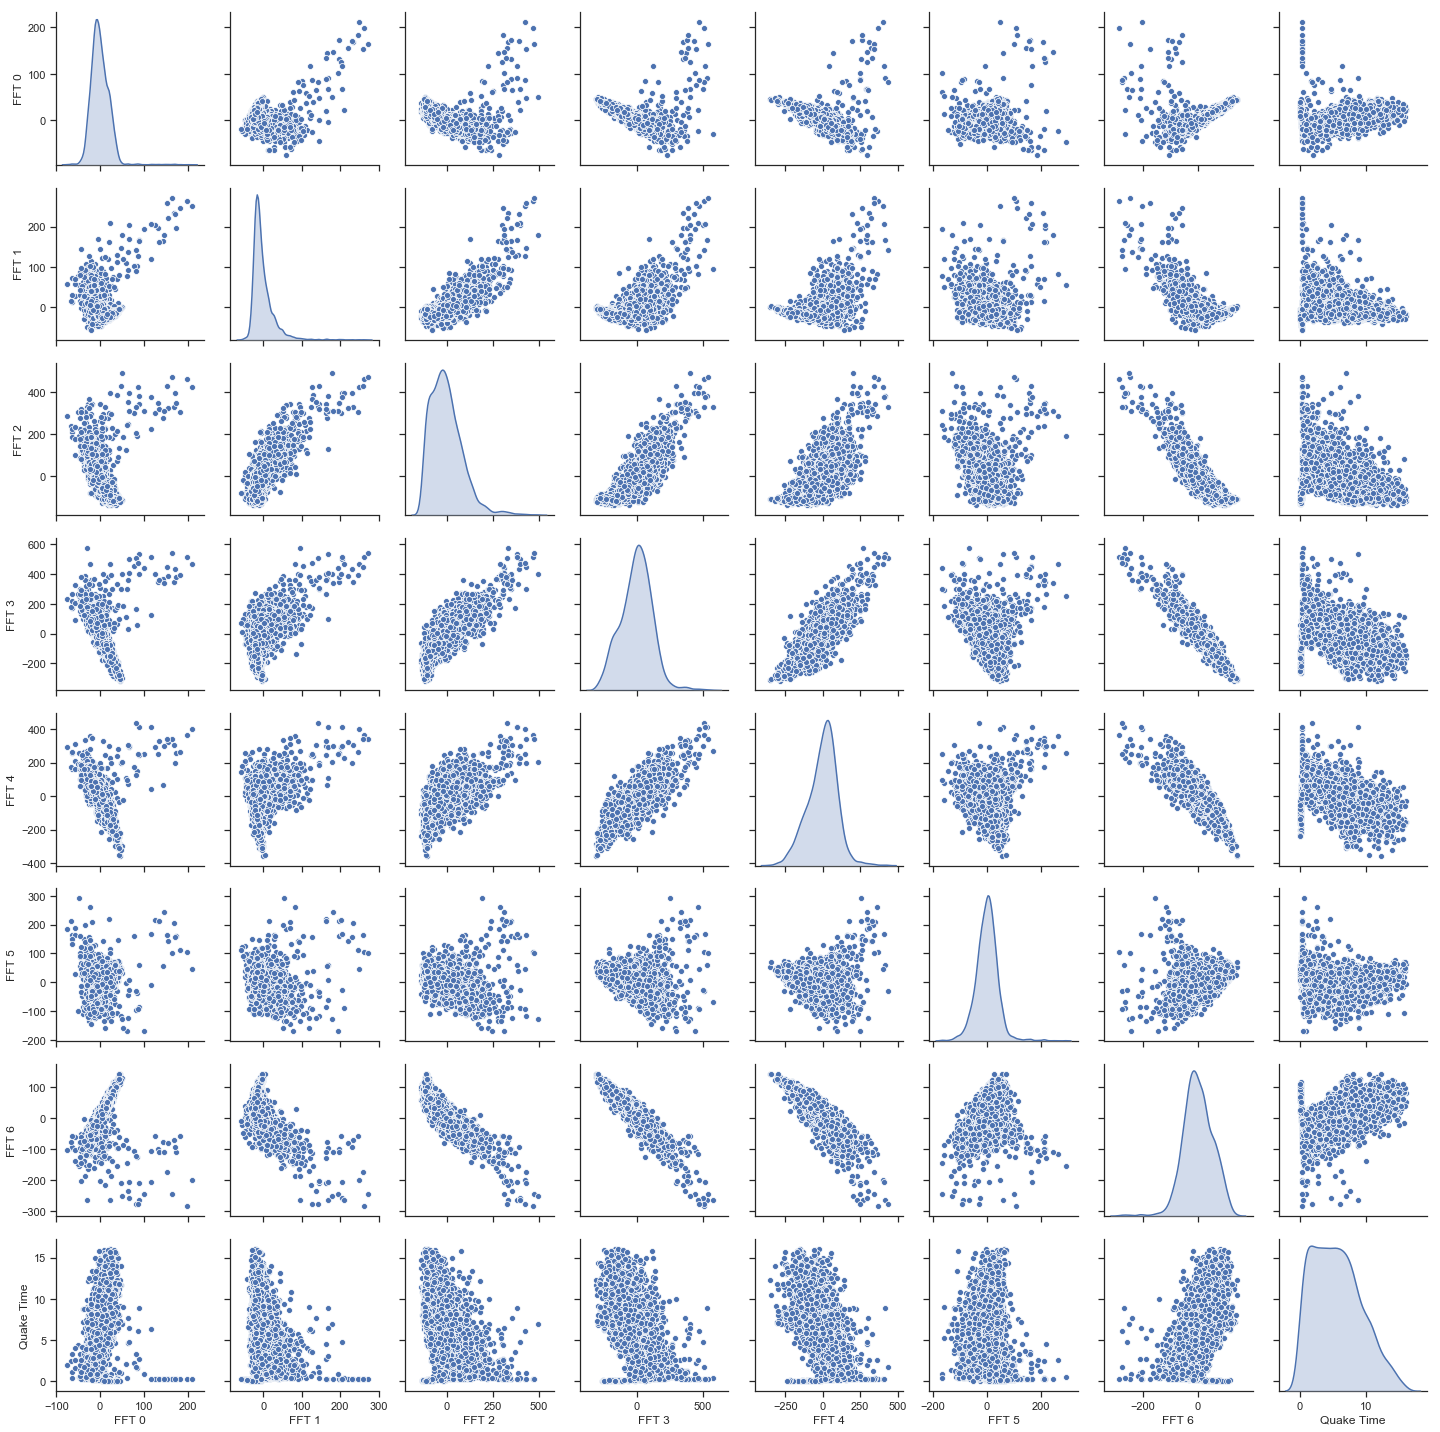

In [15]:
cuts=[0,1000,2000,4000,7500,12500,17000,20000,25000]
time_to_event=[]
summed_band_diff_0=[]
summed_band_diff_1=[]
summed_band_diff_2=[]
summed_band_diff_3=[]
summed_band_diff_4=[]
summed_band_diff_5=[]
summed_band_diff_6=[]
cmin=20000
cmax=25000
N=5

fft_Vec=[]
for i in range(4000):
    sample1=x_train[i]
    fftmag=np.log10(np.abs(np.fft.fft(sample1))[0:cut])
    fft_Vec.append(fftmag)
allm=np.mean(fft_Vec,0)
allm=np.divide(allm,np.mean(allm))


for i in range(4000):
    sample1=x_train[i]
    time_to_event.append(y_train[i])
    fftmag=np.log10(np.abs(np.fft.fft(sample1))[0:cut])
    fftmag=np.divide(fftmag,np.mean(fftmag))-allm
    summed_band_diff_0.append(np.sum(fftmag[cuts[0]:cuts[1]]))
    summed_band_diff_1.append(np.sum(fftmag[cuts[1]:cuts[2]]))
    summed_band_diff_2.append(np.sum(fftmag[cuts[2]:cuts[3]]))
    summed_band_diff_3.append(np.sum(fftmag[cuts[3]:cuts[4]]))
    summed_band_diff_4.append(np.sum(fftmag[cuts[4]:cuts[5]]))
    summed_band_diff_5.append(np.sum(fftmag[cuts[5]:cuts[6]]))
    summed_band_diff_6.append(np.sum(fftmag[cuts[6]:cuts[7]]))
    
d = {"FFT 0":summed_band_diff_0,"FFT 1":summed_band_diff_1,"FFT 2":summed_band_diff_2,"FFT 3":summed_band_diff_3,"FFT 4":summed_band_diff_4,\
    "FFT 5":summed_band_diff_5,"FFT 6":summed_band_diff_6,"Quake Time":time_to_event}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")
print("Correlations in normalized power differences for various frequency bands")